In [2]:
################################################################################################################

import os
import pandas as pd 

In [3]:
################################################################################################################

root = r"C:\Users\aleen\Desktop\Master Thesis\Data\amsterdam\calendar\minis"
listdir = os.listdir(root) # returns list
os.chdir(root)

In [9]:
len(listdir)

50

In [5]:
################################################################################################################

def walking_directory_tree(directory_path):
    '''
    Walking a directory tree and printing the names of the directories and files.
    Returns a tuple of (list of dirnames, list of filenames).
    ''' 
    # print(f'Found directory: {directory_path}') 
    
    dirnames_list = []
    filenames_list = []
    for dirpath, dirnames, files in os.walk('.'):
        for folder_name in dirnames:
            dirnames_list.append(folder_name)
        for file_name in files:
            filenames_list.append(file_name)
    return(dirnames_list, filenames_list)

walking_directory_tree(root)

################################################################################################################

def concatenate_df(root, filetype, filename):
    '''
    Ex input: (r"E:\Airbnb\Data\amsterdam\calendar\minis", "calendar", "calendar.csv")
    '''
    # List of folders to parse 
    listdir = walking_directory_tree(root)[0]
    
    dict = {} # For creating names for our datafranes 
    for i in range(len(listdir)):
        dict["df{0}".format(i)] = pd.read_csv(root + "\\" + listdir[i] + "\\" + filename)
    
    # We can perhaps extend this function later. 
    if filetype == "calendar":
        # Need to get rid of irrelevant columns. 
        for df in dict.values():
            df.drop(columns=["count","std","min","25%","50%","75%","max"], inplace=True)
            # Also, the date needs to be changed to datetime. 
            df["date"] = pd.to_datetime(df["date"]) # If not already datetime. 
            
    # List to hold intermediate dataframes.
    lst = []
    for df in dict.values():
        df.set_index('date', inplace=True) # Vezi aici!
        lst.append(df)
        
    for i in range(len(lst)):
        lst[i] = lst[i].rename(columns={'mean':str(listdir[i])})
    
    concat_calendarday = pd.concat(lst, axis=1)
    concat_calendarday['average_price'] = concat_calendarday.mean(axis=1)
    concat_calendarday['date'] = concat_calendarday.index
    concat_calendarday["date"] = pd.to_datetime(concat_calendarday["date"])
    calendar = concat_calendarday[['average_price','date']]
    
    return (calendar)

In [6]:
calendar = concatenate_df(root, "calendar", "calendar.csv")

In [125]:
calendar.to_csv(root + "\\" + "amsterdam_calendar.csv")

In [34]:
test1 = pd.read_csv(r"C:\Users\aleen\Desktop\Master Thesis\calendar.csv")

In [35]:
test1.sample()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
5685942,34713050,2020-05-25,f,$160.00,$160.00,8,1125


In [20]:
test = pd.read_csv(r"C:\Users\aleen\Desktop\Master Thesis\listings.csv")
test.sample(5)

C:\Users\aleen\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
5759,14819536,https://www.airbnb.com/rooms/14819536,20191109094909,2019-11-09,Habitación doble en el centro de Barcelona!,Habitacion de matrimonio en el centro de Barce...,NaN,Habitacion de matrimonio en el centro de Barce...,none,Es un barrio muy céntrico y distracción no fal...,...,t,f,flexible,f,f,1,0,1,0,0.70
134,281978,https://www.airbnb.com/rooms/281978,20191109094909,2019-11-09,Big Private Room - Paseo de Gracia,"DO NOT USE THE RED BUTTON ""REQUEST TO BOOK"". ...",PLEASE CONTACT ME BEFORE BOOKING It's a big pr...,"DO NOT USE THE RED BUTTON ""REQUEST TO BOOK"". ...",none,NaN,...,f,f,strict_14_with_grace_period,f,f,6,0,6,0,1.28
13649,31558714,https://www.airbnb.com/rooms/31558714,20191109094909,2019-11-09,"Modern Studio,Sleeps3,10min Sagrada Familia Te...","Welcome to my lovely, modern apartment - the p...","The studio is spacious and relaxing, the ideal...","Welcome to my lovely, modern apartment - the p...",none,"The apartment is located in Gràcia, which is a...",...,t,f,flexible,f,f,1,1,0,0,2.37
3209,6724628,https://www.airbnb.com/rooms/6724628,20191109094909,2019-11-09,Gracia Deluxe,This 3-bedroom apartment in the heart of Barce...,"- 3 bedrooms with wide, comfortable beds - Ful...",This 3-bedroom apartment in the heart of Barce...,none,Long the residence of small industries and cra...,...,t,f,moderate,f,f,77,77,0,0,1.48
15791,34993045,https://www.airbnb.com/rooms/34993045,20191109094909,2019-11-09,Penthouse with private and fantastic Terrace,Renovated apartment with beautiful terrace. It...,Apartment of 64 m2 Living/dining room with...,Renovated apartment with beautiful terrace. It...,none,Apartment located near the Sagrada Familia and...,...,f,f,strict_14_with_grace_period,f,f,30,30,0,0,NaN


In [30]:
test1.describe()

,listing_id,minimum_nights,maximum_nights
count,7.456220e+06,7.456220e+06,7.456220e+06
mean,2.286960e+07,9.003705e+00,2.109450e+05
std,1.236714e+07,1.882940e+01,2.124763e+07
min,1.866600e+04,1.000000e+00,1.000000e+00
25%,1.326226e+07,1.000000e+00,5.800000e+01
50%,2.415390e+07,2.000000e+00,1.125000e+03
75%,3.432116e+07,4.000000e+00,1.125000e+03
max,3.997381e+07,9.000000e+02,2.147484e+09


In [106]:
test1 = pd.read_csv(r"C:\Users\aleen\Desktop\Master Thesis\calendar.csv")

In [107]:
test1["price"] = test1["price"].replace('[\$,]', '', regex=True).astype(float)
# Then assigning new data type to numeric so we can do calculations.
test1["price"] = pd.to_numeric(test1["price"])

In [108]:
import datetime as dt

C:\Users\aleen\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\aleen\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 662662., 2333852., 1232010.,  898710.,  467449.,  464270.,
         258816.,  282013.,  129201.,  122378.]),
 array([  0. ,  25.2,  50.4,  75.6, 100.8, 126. , 151.2, 176.4, 201.6,
        226.8, 252. ]),
 <a list of 10 Patch objects>)

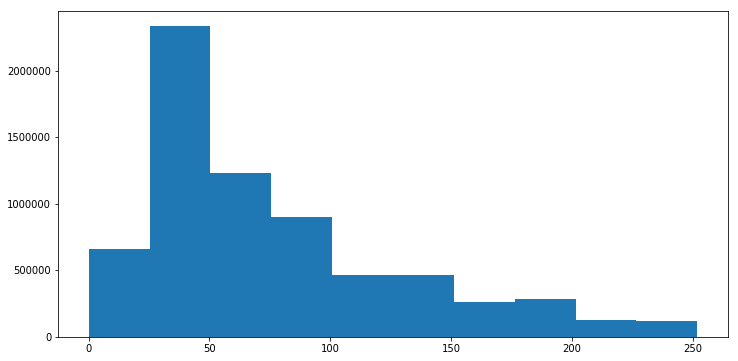

In [122]:
import matplotlib.pyplot as plt
import numpy as np
# Data to be plotted 
x = test1.price
# The figure size must be specified before plotting-
plt.figure(figsize=(12,6))
plt.hist(x)

In [91]:
qhigh = test1["price"].quantile(0.99)
qlow = test1["price"].quantile(0.01)

In [99]:
test1.drop(test1[ (test1.price > qhigh) & (test1.price < qlow) ].index, axis=0, inplace=True)

In [94]:
test1 = test1.drop(test1[test1.price > qhigh].index)

In [96]:
test1.price.mean()

102.89713645235818

In [110]:
q1 = test1["price"].quantile(0.25)
q3 = test1["price"].quantile(0.75)
iqr = q3-q1
lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)

In [121]:
test1.drop(test1[ (test1.price > upper_bound) ].index, axis=0, inplace=True)

In [116]:
lower_bound

-87.5

In [117]:
upper_bound

252.5

In [118]:
qlow

16.0

In [119]:
qhigh

1020.0

In [120]:
iqr

85.0

In [128]:
calendar.isnull().any()

2015-04-05        True
2015-08-21        True
2015-09-03        True
2015-10-02        True
2015-11-06        True
2015-12-03        True
2016-01-03        True
2016-02-03        True
2016-04-04        True
2016-05-03        True
2016-06-03        True
2016-07-04        True
2016-08-04        True
2016-09-03        True
2016-11-03        True
2016-12-04        True
2017-01-02        True
2017-02-03        True
2017-03-02        True
2017-04-02        True
2017-05-03        True
2017-06-02        True
2017-07-03        True
2017-08-03        True
2017-09-04        True
2017-10-03        True
2017-11-03        True
2017-12-04        True
2018-04-07        True
2018-05-10        True
2018-06-06        True
2018-07-06        True
2018-08-07        True
2018-09-08        True
2018-10-05        True
2018-11-04        True
2018-12-06        True
2019-01-13        True
2019-02-04        True
2019-03-07        True
2019-04-08        True
2019-05-06        True
2019-06-04        True
2019-07-08 